<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [ ]:
#!conda install geopandas
#!conda install geopy

#!pip install geopandas
#!#pip install geopy

In [1]:
# load libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs
import seaborn as sns
import mapclassify
%config InlineBackend.figure_format = 'retina'


In [2]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
print("Geometry Column Name : ", world.geometry.name)
print("Dataset Size : ", world.shape)
world.head()

Geometry Column Name :  geometry
Dataset Size :  (177, 6)


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


/Users/maartenk/opt/anaconda3/lib/python3.7/site-packages/geopandas/geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


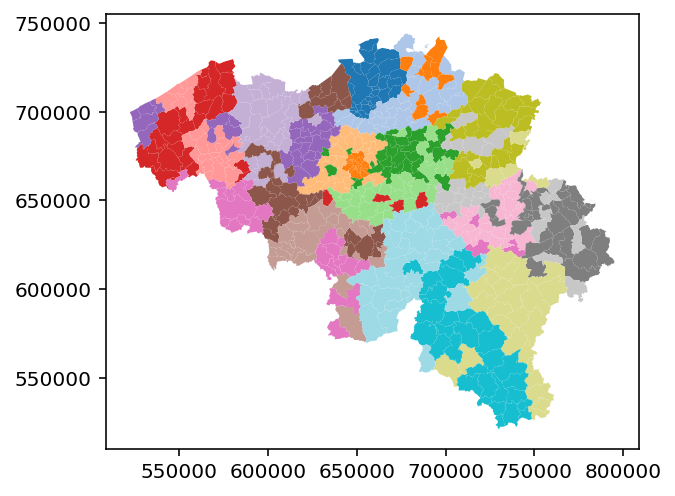

In [3]:
# Create a data directory
shapedir='/Users/maartenk/Documents/git/Cookbooks/Sources/ShapeFiles/AdminVector_2022_L08_gpkg/'


# read files
#https://ac.ngi.be/client-open/tM1MrkYvV5CiccIa3D3m?language=en&openpath=ngi-standard-open%2FVectordata%2FAdminVector&tab=dataaccess&auth=false&open=true&accesscode=tM1MrkYvV5CiccIa3D3mhttps://ac.ngi.be/client-open/tM1MrkYvV5CiccIa3D3m?language=en&openpath=ngi-standard-open%2FVectordata%2FAdminVector&tab=dataaccess&auth=false&open=true&accesscode=tM1MrkYvV5CiccIa3D3m

file = 'municipality_3812.gpkg' 
fp = shapedir+file


# create geopandas
map_df_woonplaats = gpd.read_file(fp)


map_df_woonplaats.plot(cmap='tab20');

In [4]:
map_df_woonplaats.head(2)

,tgid,modifdate,arrondissementcapital,provincecapital,regioncapital,countrycapital,niscode,city,languagestatute,nameger,namefre,namedut,geometry
0,{F08D52FC-A4B7-4D74-94CF-2F9784E609DD},2007-01-05T00:00:00+01:00,False,False,False,False,11001,2,1,Aartselaar,Aartselaar,Aartselaar,"MULTIPOLYGON (((650219.173 700596.060, 650220...."
1,{2CC53084-53C6-4B68-8775-25075F330E76},2007-01-05T00:00:00+01:00,True,True,False,False,11002,1,1,Antwerpen,Anvers,Antwerpen,"MULTIPOLYGON (((650423.422 703934.632, 650416...."


In [5]:
map_df_woonplaats['languagestatute'].value_counts()

1    288
2    251
4     19
5     12
8      9
6      4
7      2
Name: languagestatute, dtype: int64

,geometry,tgid,modifdate,arrondissementcapital,provincecapital,regioncapital,countrycapital,niscode,city,nameger,namefre,namedut
languagestatute,,,,,,,,,,,,
1,"MULTIPOLYGON (((754408.942 657294.967, 754332....",{F08D52FC-A4B7-4D74-94CF-2F9784E609DD},2007-01-05T00:00:00+01:00,False,False,False,False,11001,2,Aartselaar,Aartselaar,Aartselaar
2,"MULTIPOLYGON (((734371.410 523052.913, 733607....",{D9E59180-D7F9-4201-A59D-085CE971F2FE},2007-01-05T00:00:00+01:00,False,False,False,False,25005,2,Beauvechain,Beauvechain,Bevekom
3,"MULTIPOLYGON (((776513.779 596711.101, 776521....",{13FC1E91-F235-4058-89FB-49754FC2A7D3},2007-01-05T00:00:00+01:00,False,False,False,False,63001,2,Amel,Amblève,Amel
4,"POLYGON ((649667.524 662512.361, 649601.942 66...",{555A8E8B-AF89-47AF-8E68-259538BFF5C5},2007-01-05T00:00:00+01:00,False,False,False,False,21001,2,Anderlecht,Anderlecht,Anderlecht


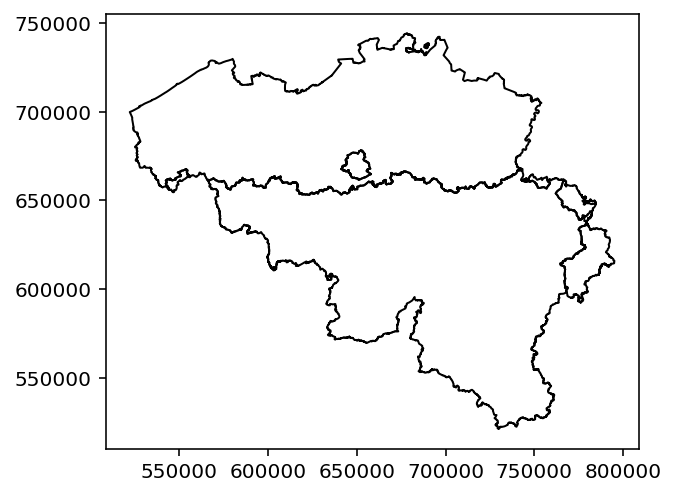

In [8]:
# Recode to promary language areas: Flemish, French, German, Multi
map_df_woonplaats.loc[map_df_woonplaats['languagestatute'] == 5, 'languagestatute'] = 1
map_df_woonplaats.loc[map_df_woonplaats['languagestatute'] == 6, 'languagestatute'] = 2
map_df_woonplaats.loc[map_df_woonplaats['languagestatute'] == 7, 'languagestatute'] = 2
map_df_woonplaats.loc[map_df_woonplaats['languagestatute'] == 8, 'languagestatute'] = 3



taal = map_df_woonplaats[['languagestatute', 'geometry']]
taal = map_df_woonplaats.dissolve(by='languagestatute')
taal.plot(fc='none', ec='black');
taal.head()

In [9]:
map_df_woonplaats['languagestatute'].value_counts()

1    300
2    257
4     19
3      9
Name: languagestatute, dtype: int64

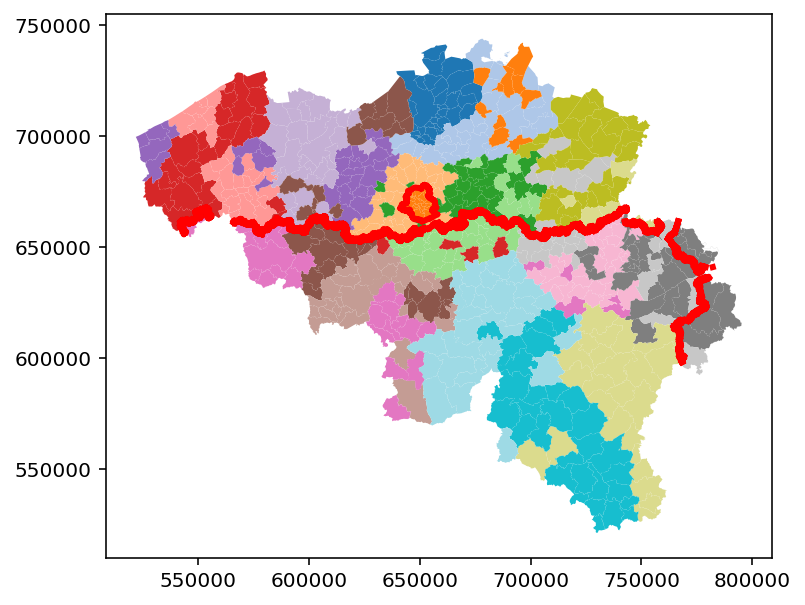

In [10]:
#create geometry per language
vlaams = taal.geometry[1]   
waals = taal.geometry[2] 
duits = taal.geometry[3]

# create langauge divide
taalgrens = vlaams.intersection(waals) 
taalgrensDu = waals.intersection(duits)

# Plot language divide
# https://stackoverflow.com/questions/55012862/return-length-of-border-segment-between-geographic-areas-in-geopandas
ax = map_df_woonplaats.plot(cmap='tab20', figsize=(8,5))
for ea in taalgrens.__geo_interface__['coordinates']:
    #print(ea)
    ax.plot(np.array(ea)[:,0], np.array(ea)[:,1], linewidth=3, color="red")
for ea in taalgrensDu.__geo_interface__['coordinates']:
    #print(ea)
    ax.plot(np.array(ea)[:,0], np.array(ea)[:,1], linewidth=3, color="red")
taal[3:4].plot(fc='none', ec='red', lw=3, ax=ax)    
    
plt.show()

In [11]:
taal[1:2]

,geometry,tgid,modifdate,arrondissementcapital,provincecapital,regioncapital,countrycapital,niscode,city,nameger,namefre,namedut
languagestatute,,,,,,,,,,,,
2,"MULTIPOLYGON (((734371.410 523052.913, 733607....",{D9E59180-D7F9-4201-A59D-085CE971F2FE},2007-01-05T00:00:00+01:00,False,False,False,False,25005,2,Beauvechain,Beauvechain,Bevekom


In [12]:
import pandas as pd
# https://epistat.sciensano.be/COVID19BE_codebook.pdf
# https://epistat.wiv-isp.be/covid

df = pd.read_csv('/Users/maartenk/Documents/git/CookBooks/Sources/COVID19BE_CASES_MUNI.csv',
                 sep=',')
df.shape

(257075, 9)

In [13]:
url= 'https://epistat.sciensano.be/Data/COVID19BE_CASES_MUNI.csv'

df = pd.read_csv(url, sep=',')
df.tail(5)

,NIS5,DATE,TX_DESCR_NL,TX_DESCR_FR,TX_ADM_DSTR_DESCR_NL,TX_ADM_DSTR_DESCR_FR,PROVINCE,REGION,CASES
278201,93090.0,2022-03-11,Viroinval,Viroinval,Arrondissement Philippeville,Arrondissement de Philippeville,Namur,Wallonia,<5
278202,93090.0,2022-03-12,Viroinval,Viroinval,Arrondissement Philippeville,Arrondissement de Philippeville,Namur,Wallonia,<5
278203,93090.0,2022-03-14,Viroinval,Viroinval,Arrondissement Philippeville,Arrondissement de Philippeville,Namur,Wallonia,<5
278204,93090.0,2022-03-16,Viroinval,Viroinval,Arrondissement Philippeville,Arrondissement de Philippeville,Namur,Wallonia,<5
278205,93090.0,2022-03-17,Viroinval,Viroinval,Arrondissement Philippeville,Arrondissement de Philippeville,Namur,Wallonia,<5


In [14]:
df.columns

Index(['NIS5', 'DATE', 'TX_DESCR_NL', 'TX_DESCR_FR', 'TX_ADM_DSTR_DESCR_NL',
       'TX_ADM_DSTR_DESCR_FR', 'PROVINCE', 'REGION', 'CASES'],
      dtype='object')

In [15]:
df.dtypes

NIS5                    float64
DATE                     object
TX_DESCR_NL              object
TX_DESCR_FR              object
TX_ADM_DSTR_DESCR_NL     object
TX_ADM_DSTR_DESCR_FR     object
PROVINCE                 object
REGION                   object
CASES                    object
dtype: object

In [16]:
df.sample(10)

,NIS5,DATE,TX_DESCR_NL,TX_DESCR_FR,TX_ADM_DSTR_DESCR_NL,TX_ADM_DSTR_DESCR_FR,PROVINCE,REGION,CASES
160570,51069.0,2021-01-15,Lessen,Lessines,Arrondissement Aat,Arrondissement d’Ath,Hainaut,Wallonia,<5
266337,91120.0,2021-12-01,Somme-Leuze,Somme-Leuze,Arrondissement Dinant,Arrondissement de Dinant,Namur,Wallonia,12
161492,52011.0,2020-05-16,Charleroi,Charleroi,Arrondissement Charleroi,Arrondissement de Charleroi,Hainaut,Wallonia,<5
188991,58004.0,2022-01-21,Morlanwelz,Morlanwelz,Arrondissement La Louvière,Arrondissement de La Louvière,Hainaut,Wallonia,113
21176,12026.0,2021-01-30,Nijlen,Nijlen,Arrondissement Mechelen,Arrondissement de Malines,Antwerpen,Flanders,5
265320,91103.0,2020-11-05,Onhaye,Onhaye,Arrondissement Dinant,Arrondissement de Dinant,Namur,Wallonia,5
184483,57093.0,2020-11-13,Brunehaut,Brunehaut,Arrondissement Doornik-Moeskroen,Arrondissement de Tournai-Mouscron,Hainaut,Wallonia,12
78006,24104.0,2021-11-20,Tervuren,Tervuren,Arrondissement Leuven,Arrondissement de Louvain,VlaamsBrabant,Flanders,17
168794,53028.0,2021-05-30,Frameries,Frameries,Arrondissement Bergen,Arrondissement de Mons,Hainaut,Wallonia,<5
191687,61031.0,2021-08-19,Hoei,Huy,Arrondissement Hoei,Arrondissement de Huy,Liège,Wallonia,5


In [17]:
df = df[df['NIS5'].notna()]
df['NIS5'] = df['NIS5'].astype(int)

In [18]:
df.head()

,NIS5,DATE,TX_DESCR_NL,TX_DESCR_FR,TX_ADM_DSTR_DESCR_NL,TX_ADM_DSTR_DESCR_FR,PROVINCE,REGION,CASES
730,11001,2020-03-20,Aartselaar,Aartselaar,Arrondissement Antwerpen,Arrondissement d’Anvers,Antwerpen,Flanders,<5
731,11001,2020-03-21,Aartselaar,Aartselaar,Arrondissement Antwerpen,Arrondissement d’Anvers,Antwerpen,Flanders,<5
732,11001,2020-03-22,Aartselaar,Aartselaar,Arrondissement Antwerpen,Arrondissement d’Anvers,Antwerpen,Flanders,<5
733,11001,2020-03-23,Aartselaar,Aartselaar,Arrondissement Antwerpen,Arrondissement d’Anvers,Antwerpen,Flanders,<5
734,11001,2020-03-24,Aartselaar,Aartselaar,Arrondissement Antwerpen,Arrondissement d’Anvers,Antwerpen,Flanders,<5


In [19]:
df['DATE'].min(), df['DATE'].max()



('2020-03-01', '2022-03-18')

In [20]:
start = '2022-01-01'
stop = '2022-31-12'

In [21]:
start = df['DATE'].min()
stop = df['DATE'].max()

In [22]:
updated = df['DATE'].max()#[0][:10]
updated

'2022-03-18'

In [23]:
# df = df[df['NIS5'], df['DATETX_DESCR_NL'], df['PROVINCE'], df['REGION'], df['CASES']]
df = df[['NIS5','DATE' ,'TX_DESCR_NL','PROVINCE', 'REGION','CASES']]

In [24]:
df['CASES']

730       <5
731       <5
732       <5
733       <5
734       <5
          ..
278201    <5
278202    <5
278203    <5
278204    <5
278205    <5
Name: CASES, Length: 277476, dtype: object

In [25]:
df['CASES'] = df['CASES'].str.replace('<5','3')

In [26]:
df['CASES'] = df['CASES'].astype(int)

In [27]:
df.dtypes

NIS5            int64
DATE           object
TX_DESCR_NL    object
PROVINCE       object
REGION         object
CASES           int64
dtype: object

In [28]:
#https://statbel.fgov.be/nl/open-data/bevolking-naar-woonplaats-nationaliteit-burgerlijke-staat-leeftijd-en-geslacht-10
dfp = pd.read_excel('/Users/maartenk/Documents/git/CookBooks/Sources/TF_SOC_POP_STRUCT_2021.xlsx')

In [29]:
dfp.head()

,CD_REFNIS,TX_DESCR_NL,TX_DESCR_FR,CD_DSTR_REFNIS,TX_ADM_DSTR_DESCR_NL,TX_ADM_DSTR_DESCR_FR,CD_PROV_REFNIS,TX_PROV_DESCR_NL,TX_PROV_DESCR_FR,CD_RGN_REFNIS,...,TX_RGN_DESCR_FR,CD_SEX,CD_NATLTY,TX_NATLTY_NL,TX_NATLTY_FR,CD_CIV_STS,TX_CIV_STS_NL,TX_CIV_STS_FR,CD_AGE,MS_POPULATION
0,11001,Aartselaar,Aartselaar,11000,Arrondissement Antwerpen,Arrondissement d’Anvers,10000.0,Provincie Antwerpen,Province d’Anvers,2000,...,Région flamande,M,BEL,Belgen,Belges,4,Gescheiden,Divorcé,85,2
1,11001,Aartselaar,Aartselaar,11000,Arrondissement Antwerpen,Arrondissement d’Anvers,10000.0,Provincie Antwerpen,Province d’Anvers,2000,...,Région flamande,F,BEL,Belgen,Belges,4,Gescheiden,Divorcé,54,21
2,11001,Aartselaar,Aartselaar,11000,Arrondissement Antwerpen,Arrondissement d’Anvers,10000.0,Provincie Antwerpen,Province d’Anvers,2000,...,Région flamande,F,BEL,Belgen,Belges,4,Gescheiden,Divorcé,61,14
3,11001,Aartselaar,Aartselaar,11000,Arrondissement Antwerpen,Arrondissement d’Anvers,10000.0,Provincie Antwerpen,Province d’Anvers,2000,...,Région flamande,F,BEL,Belgen,Belges,4,Gescheiden,Divorcé,64,21
4,11001,Aartselaar,Aartselaar,11000,Arrondissement Antwerpen,Arrondissement d’Anvers,10000.0,Provincie Antwerpen,Province d’Anvers,2000,...,Région flamande,M,BEL,Belgen,Belges,4,Gescheiden,Divorcé,76,5


In [30]:
dfp.dtypes

CD_REFNIS                 int64
TX_DESCR_NL              object
TX_DESCR_FR              object
CD_DSTR_REFNIS            int64
TX_ADM_DSTR_DESCR_NL     object
TX_ADM_DSTR_DESCR_FR     object
CD_PROV_REFNIS          float64
TX_PROV_DESCR_NL         object
TX_PROV_DESCR_FR         object
CD_RGN_REFNIS             int64
TX_RGN_DESCR_NL          object
TX_RGN_DESCR_FR          object
CD_SEX                   object
CD_NATLTY                object
TX_NATLTY_NL             object
TX_NATLTY_FR             object
CD_CIV_STS                int64
TX_CIV_STS_NL            object
TX_CIV_STS_FR            object
CD_AGE                    int64
MS_POPULATION             int64
dtype: object

In [31]:
groupedPop = dfp.groupby('CD_REFNIS').sum()

In [32]:
groupedPop = groupedPop['MS_POPULATION']

In [33]:
groupedPop

CD_REFNIS
11001     14455
11002    529417
11004     13527
11005     18799
11007     11077
          ...  
93018      2962
93022     11256
93056      9244
93088     18355
93090      5677
Name: MS_POPULATION, Length: 581, dtype: int64

In [34]:
groupedPop = pd.merge(groupedPop, dfp['TX_DESCR_NL'], left_on=groupedPop.index.astype(str), 
                       right_on=dfp['CD_REFNIS'].astype(str))

In [35]:
groupedPop = groupedPop.drop_duplicates()

In [36]:
groupedPop.dtypes

key_0            object
MS_POPULATION     int64
TX_DESCR_NL      object
dtype: object

In [37]:
groupedGem = df.loc[(df['DATE'] >= start) &
      (df['DATE'] <= stop)].groupby('NIS5').sum()

In [38]:
groupedGem

,CASES
NIS5,
11001,4743
11002,167645
11004,4426
11005,6159
11007,3626
...,...
93018,1110
93022,3859
93056,3213


In [39]:
map_df_combined = pd.merge(map_df_woonplaats, groupedGem, left_on=map_df_woonplaats['niscode'], 
                           right_on=groupedGem.index.astype(str))

In [40]:
map_df_combined.head()

,key_0,tgid,modifdate,arrondissementcapital,provincecapital,regioncapital,countrycapital,niscode,city,languagestatute,nameger,namefre,namedut,geometry,CASES
0,11001,{F08D52FC-A4B7-4D74-94CF-2F9784E609DD},2007-01-05T00:00:00+01:00,False,False,False,False,11001,2,1,Aartselaar,Aartselaar,Aartselaar,"MULTIPOLYGON (((650219.173 700596.060, 650220....",4743
1,11002,{2CC53084-53C6-4B68-8775-25075F330E76},2007-01-05T00:00:00+01:00,True,True,False,False,11002,1,1,Antwerpen,Anvers,Antwerpen,"MULTIPOLYGON (((650423.422 703934.632, 650416....",167645
2,11004,{B9D2FDD5-BE2F-4F24-B638-64EEAAF8C530},2007-01-05T00:00:00+01:00,False,False,False,False,11004,2,1,Boechout,Boechout,Boechout,"MULTIPOLYGON (((660706.459 704172.728, 660696....",4426
3,11005,{3F6DC08D-3058-4B15-8D48-51854B266122},2007-01-05T00:00:00+01:00,False,False,False,False,11005,2,1,Boom,Boom,Boom,"MULTIPOLYGON (((651769.785 697734.315, 651769....",6159
4,11007,{05435A1C-7965-4766-BBFA-2FBF3EB0B527},2007-01-05T00:00:00+01:00,False,False,False,False,11007,2,1,Borsbeek,Borsbeek,Borsbeek,"MULTIPOLYGON (((659334.097 709025.347, 659319....",3626


In [41]:
map_df_combined = pd.merge(map_df_combined, groupedPop, left_on=map_df_combined['niscode'], 
                           right_on=groupedPop['key_0'])

In [42]:
map_df_combined.drop_duplicates(subset='key_0', inplace=True)

In [43]:
map_df_combined.head()

,key_0,key_0_x,tgid,modifdate,arrondissementcapital,provincecapital,regioncapital,countrycapital,niscode,city,languagestatute,nameger,namefre,namedut,geometry,CASES,key_0_y,MS_POPULATION,TX_DESCR_NL
0,11001,11001,{F08D52FC-A4B7-4D74-94CF-2F9784E609DD},2007-01-05T00:00:00+01:00,False,False,False,False,11001,2,1,Aartselaar,Aartselaar,Aartselaar,"MULTIPOLYGON (((650219.173 700596.060, 650220....",4743,11001,14455,Aartselaar
1,11002,11002,{2CC53084-53C6-4B68-8775-25075F330E76},2007-01-05T00:00:00+01:00,True,True,False,False,11002,1,1,Antwerpen,Anvers,Antwerpen,"MULTIPOLYGON (((650423.422 703934.632, 650416....",167645,11002,529417,Antwerpen
2,11004,11004,{B9D2FDD5-BE2F-4F24-B638-64EEAAF8C530},2007-01-05T00:00:00+01:00,False,False,False,False,11004,2,1,Boechout,Boechout,Boechout,"MULTIPOLYGON (((660706.459 704172.728, 660696....",4426,11004,13527,Boechout
3,11005,11005,{3F6DC08D-3058-4B15-8D48-51854B266122},2007-01-05T00:00:00+01:00,False,False,False,False,11005,2,1,Boom,Boom,Boom,"MULTIPOLYGON (((651769.785 697734.315, 651769....",6159,11005,18799,Boom
4,11007,11007,{05435A1C-7965-4766-BBFA-2FBF3EB0B527},2007-01-05T00:00:00+01:00,False,False,False,False,11007,2,1,Borsbeek,Borsbeek,Borsbeek,"MULTIPOLYGON (((659334.097 709025.347, 659319....",3626,11007,11077,Borsbeek


In [44]:
map_df_combined['CovDens']= map_df_combined['CASES']/map_df_combined['MS_POPULATION']

In [45]:
map_df_combined['CovDensPm'] = map_df_combined['CovDens']*1000000


In [46]:
map_df_combined['area'] = map_df_combined.geometry.to_crs({'proj':'cea'}).area/1000000 #for hectares

map_df_combined['CovPsqKm'] = map_df_combined['CASES']/map_df_combined['area']


/Users/maartenk/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator


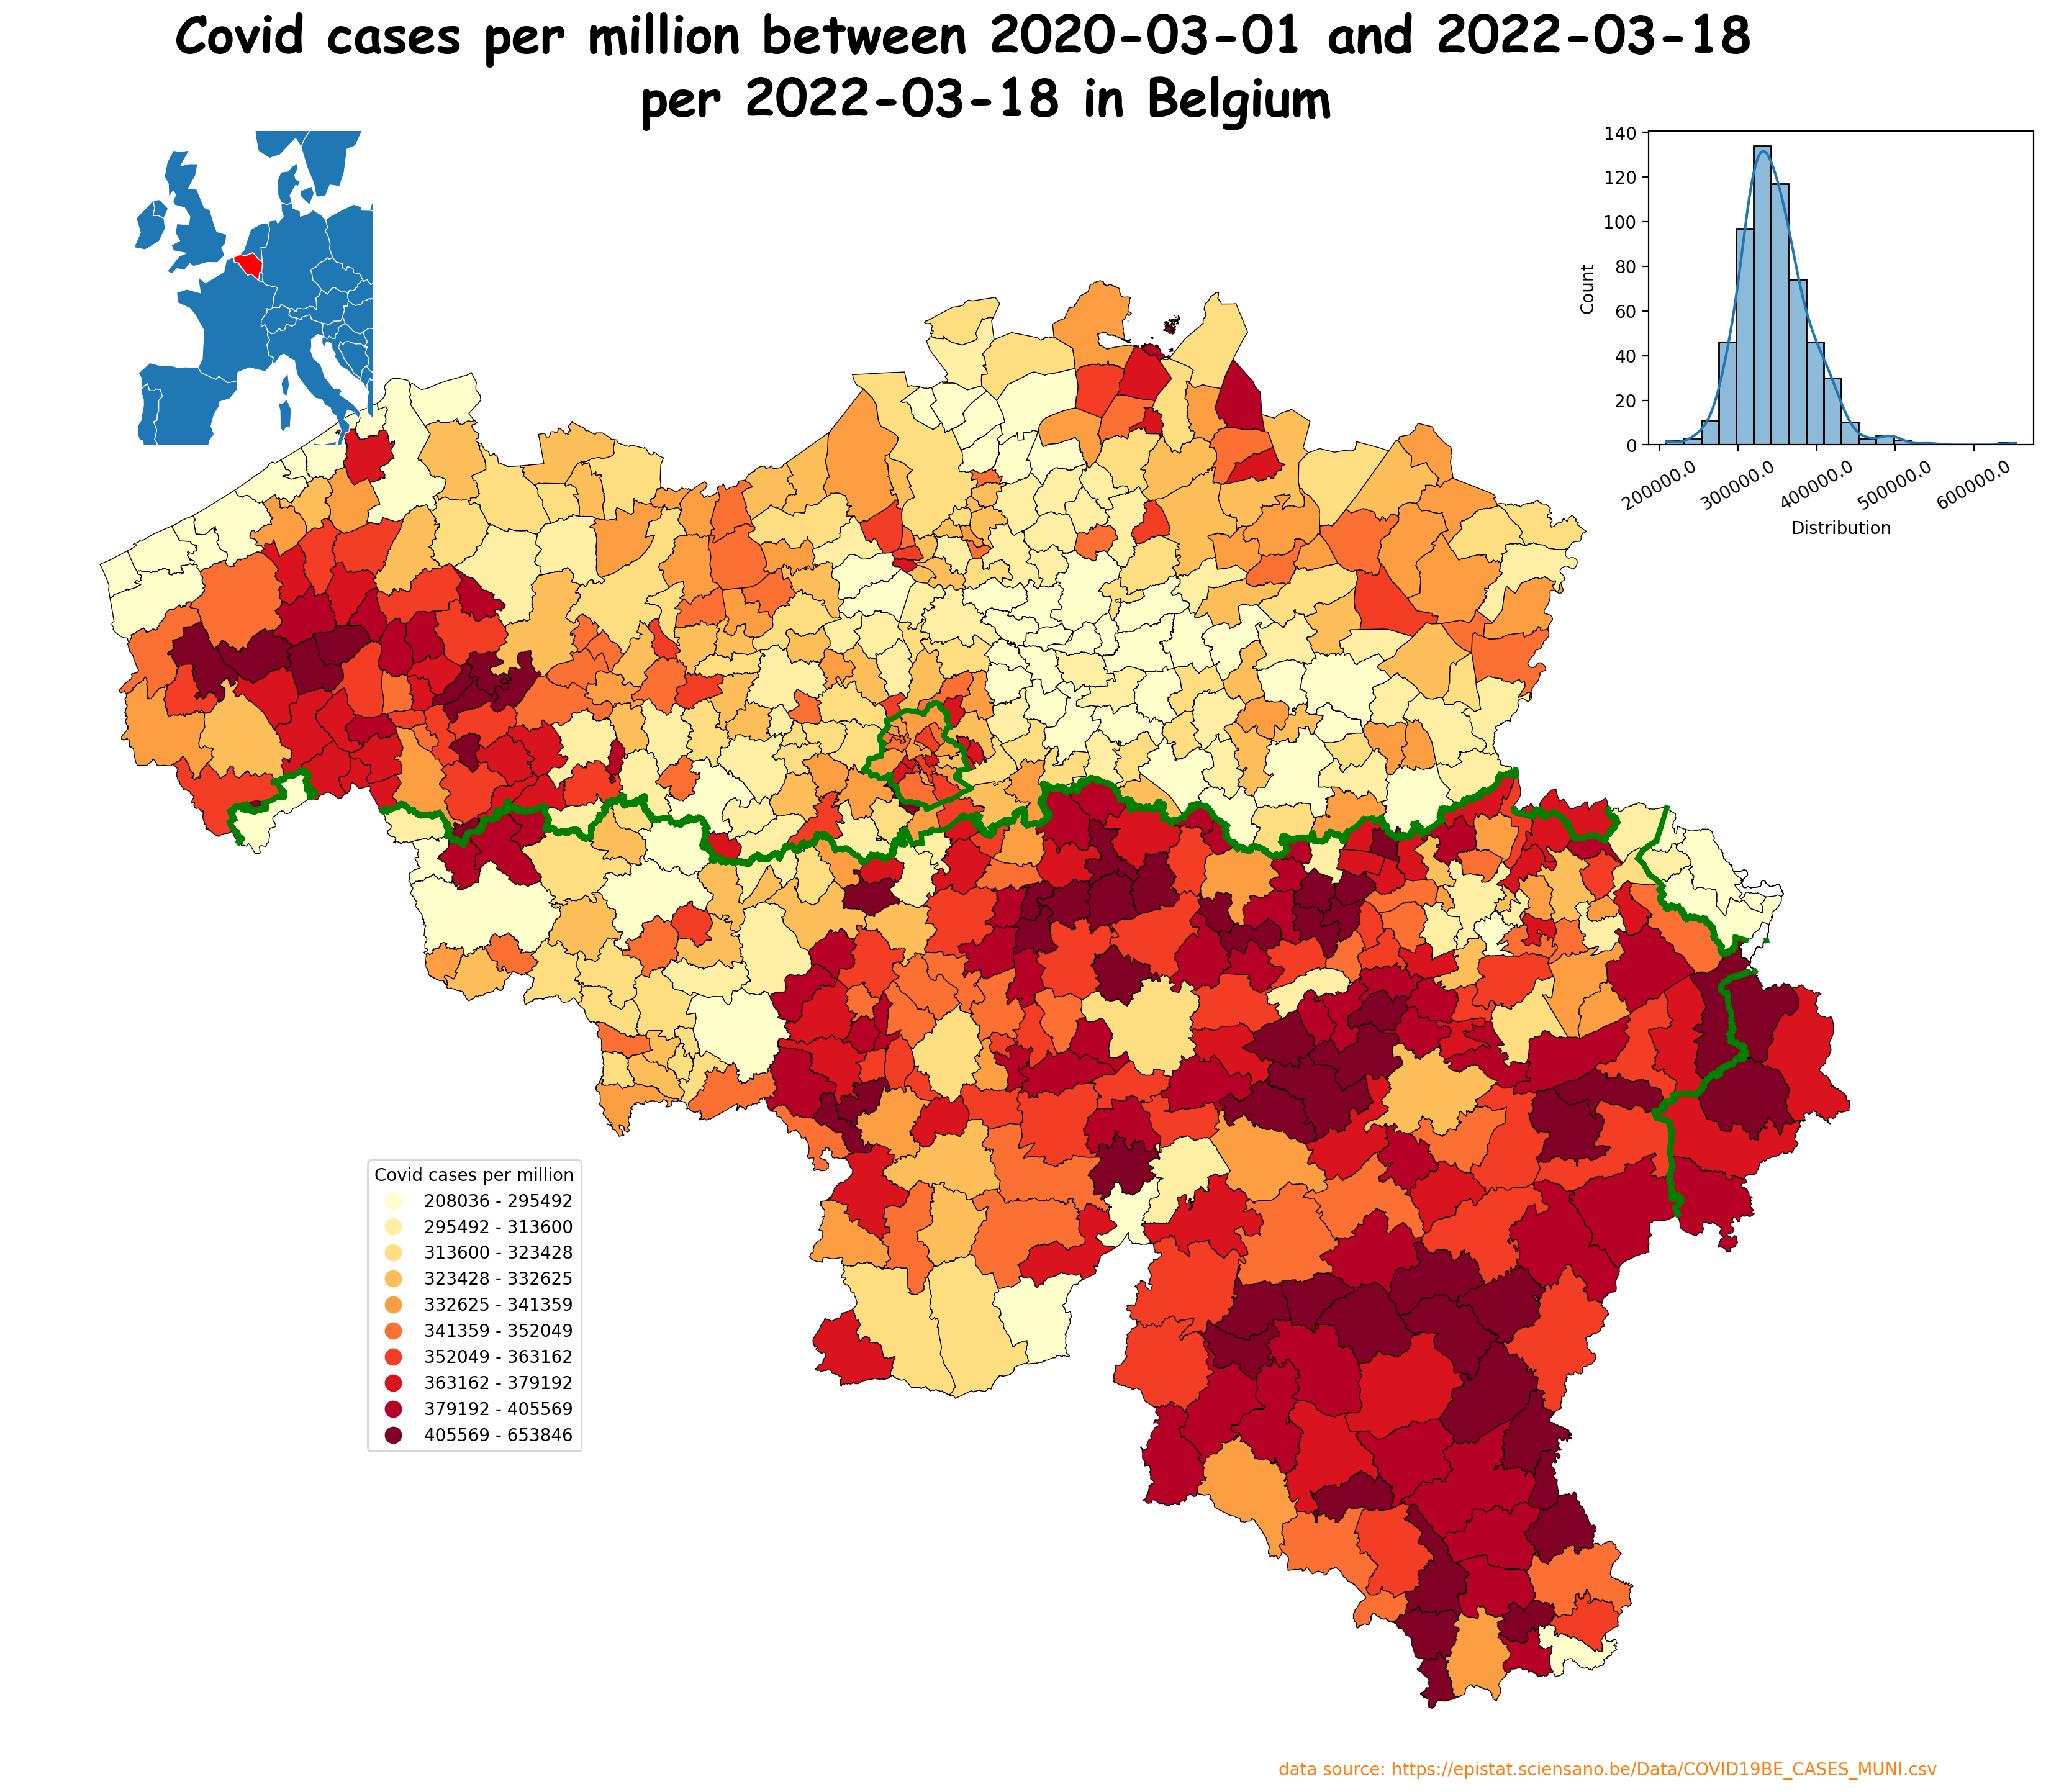

In [72]:
name = 'Covid cases per million'
# column = pd.Series(map_df_combined['CovDensPm'].loc[map_df_combined['CovDensPm']>0], name=name)
column = pd.Series(map_df_combined['CovDensPm'], name=name)
countries = ['Belgium']
russia = ['Russia']

## plot the density
fig, ax = plt.subplots(figsize=(20, 20))
plt.style.use('default')

ax.axis('off')

# fig.patch.set_facecolor('lightskyblue')



map_df_combined.loc[map_df_combined['CovDensPm']>0].plot(column='CovDensPm', 
                cmap='YlOrRd',#'tab20', 
                label=map_df_combined['CovDensPm'], 
                scheme='quantiles',
                legend=True,
                k=10,
                ec='black',
                lw=.5,
                ax=ax)
plt.title(f'{name} between {start} and {stop} \n per {updated} in {str(countries)[2:-2]}', 
          fontname="Comic Sans MS", fontsize=30, fontweight="bold")

eu_ax = ax.inset_axes([0.05,0.85,.15,.20], fc='white')
world.loc[(world['continent'] == 'Europe') & (~world['name'].isin([countries, russia]))].plot(
    ax=eu_ax, ec='white', lw=.5)
world.loc[world['name'].isin(countries)].plot(
    ax=eu_ax, ec='white', fc = 'red', lw=.5)

eu_ax.set_xlim(-10,20)
eu_ax.set_ylim(38,60)
eu_ax.axis('off')

hist_ax = ax.inset_axes([0.85,0.85,.20,.20], )
x = pd.Series(column, name='Distribution')
sns.histplot(x, bins=20,ax=hist_ax, kde=True)
a=hist_ax.get_xticks().tolist()
hist_ax.set_xticklabels(a, rotation=30)

# get all upper bounds
upper_bounds = mapclassify.Quantiles(column, k=10).bins


bounds = []
for index, upper_bound in enumerate(upper_bounds):
    if index == 0:
        lower_bound = column.min()
    else:
        lower_bound = upper_bounds[index-1]

    # format the numerical legend here
    bound = f'{lower_bound:.0f} - {upper_bound:.0f}'
    bounds.append(bound)

# get all the legend labels
legend_labels = ax.get_legend().get_texts()

# replace the legend labels
for bound, legend_label in zip(bounds, legend_labels):
    legend_label.set_text(bound)
                                     
leg = ax.get_legend()
leg.set_bbox_to_anchor((0.1, 0.1, 0.2, 0.3))

leg.set_title(name)
plt.setp(leg.get_title(), multialignment='center')
plt.setp(leg.get_texts(), multialignment='center')

######
# https://stackoverflow.com/questions/55012862/return-length-of-border-segment-between-geographic-areas-in-geopandas
# ax = map_df_woonplaats.plot(cmap="Accent", figsize=(8,5))
for ea in taalgrens.__geo_interface__['coordinates']:
    #print(ea)
    ax.plot(np.array(ea)[:,0], np.array(ea)[:,1], linewidth=3, color="green", label='language')
for ea in taalgrensDu.__geo_interface__['coordinates']:
    #print(ea)
    ax.plot(np.array(ea)[:,0], np.array(ea)[:,1], linewidth=3, color="green")
taal[3:4].plot(fc='none', ec='green', lw=3, ax=ax)    
######

text_kwargs = dict(ha='right', va='bottom', fontsize=10, color='C1')

plt.text(1,0,f'data source: {url}', transform=ax.transAxes,
     **text_kwargs);

# #https://www.ad.nl/buitenland/maakt-corona-nu-wel-of-geen-onderscheid-tussen-walen-en-vlamingen~ad229237/

In [ ]:
name = 'Covid cases per square kilometer'
# column = pd.Series(map_df_combined['CovDensPm'].loc[map_df_combined['CovDensPm']>0], name=name)
column = pd.Series(map_df_combined['CovPsqKm'], name=name)
countries = ['Belgium']
russia = ['Russia']

## plot the density
fig, ax = plt.subplots(figsize=(20, 20))
plt.style.use('default')

ax.axis('off')

# fig.patch.set_facecolor('lightskyblue')



map_df_combined.plot(column=column, 
                cmap='YlOrRd',#'tab20', 
                label=column, 
                scheme='quantiles',
                legend=True,
                k=10,
                ec='black',
                lw=.5,
                ax=ax)

plt.title(f'{name} between {start} and {stop} \n per {updated} in {str(countries)[2:-2]}', 
          fontname="Comic Sans MS", fontsize=30, fontweight="bold")


eu_ax = ax.inset_axes([0.05,0.85,.15,.20], fc='white')
world.loc[(world['continent'] == 'Europe') & (~world['name'].isin([countries, russia]))].plot(
    ax=eu_ax, ec='white', lw=.5)
world.loc[world['name'].isin(countries)].plot(
    ax=eu_ax, ec='white', fc = 'red', lw=.5)

eu_ax.set_xlim(-10,20)
eu_ax.set_ylim(38,60)
eu_ax.axis('off')

hist_ax = ax.inset_axes([0.85,0.85,.20,.20], )
x = pd.Series(column, name='Distribution')
sns.histplot(x, bins=20,ax=hist_ax, kde=True)
a=hist_ax.get_xticks().tolist()
hist_ax.set_xticklabels(a, rotation=30)

# get all upper bounds
upper_bounds = mapclassify.Quantiles(column, k=10).bins


bounds = []
for index, upper_bound in enumerate(upper_bounds):
    if index == 0:
        lower_bound = column.min()
    else:
        lower_bound = upper_bounds[index-1]

    # format the numerical legend here
    bound = f'{lower_bound:.0f} - {upper_bound:.0f}'
    bounds.append(bound)

# get all the legend labels
legend_labels = ax.get_legend().get_texts()

# replace the legend labels
for bound, legend_label in zip(bounds, legend_labels):
    legend_label.set_text(bound)
                                     
leg = ax.get_legend()
leg.set_bbox_to_anchor((0.1, 0.1, 0.2, 0.3))

leg.set_title(name)
plt.setp(leg.get_title(), multialignment='center')
plt.setp(leg.get_texts(), multialignment='center')

######
# https://stackoverflow.com/questions/55012862/return-length-of-border-segment-between-geographic-areas-in-geopandas
# ax = map_df_woonplaats.plot(cmap="Accent", figsize=(8,5))
for ea in taalgrens.__geo_interface__['coordinates']:
    #print(ea)
    ax.plot(np.array(ea)[:,0], np.array(ea)[:,1], linewidth=3, color="green", label='language')
for ea in taalgrensDu.__geo_interface__['coordinates']:
    #print(ea)
    ax.plot(np.array(ea)[:,0], np.array(ea)[:,1], linewidth=3, color="green")
taal[3:4].plot(fc='none', ec='green', lw=3, ax=ax)    
######
text_kwargs = dict(ha='right', va='bottom', fontsize=10, color='C1')

plt.text(1,0,f'data source: {url}', transform=ax.transAxes,
     **text_kwargs);


# #https://www.ad.nl/buitenland/maakt-corona-nu-wel-of-geen-onderscheid-tussen-walen-en-vlamingen~ad229237/

In [79]:
map_df_combined_be = map_df_combined.to_crs(epsg=28992)

map_df_combined_be.to_pickle('cookbooks/sources/map_df_combined_be')

In [75]:
groupedDate= df.groupby('DATE').sum()

In [76]:
groupedDate.head()

,NIS5,CASES
DATE,,
2020-03-01,453678,42
2020-03-02,388537,42
2020-03-03,1085217,81
2020-03-04,1555330,116
2020-03-05,2138004,159


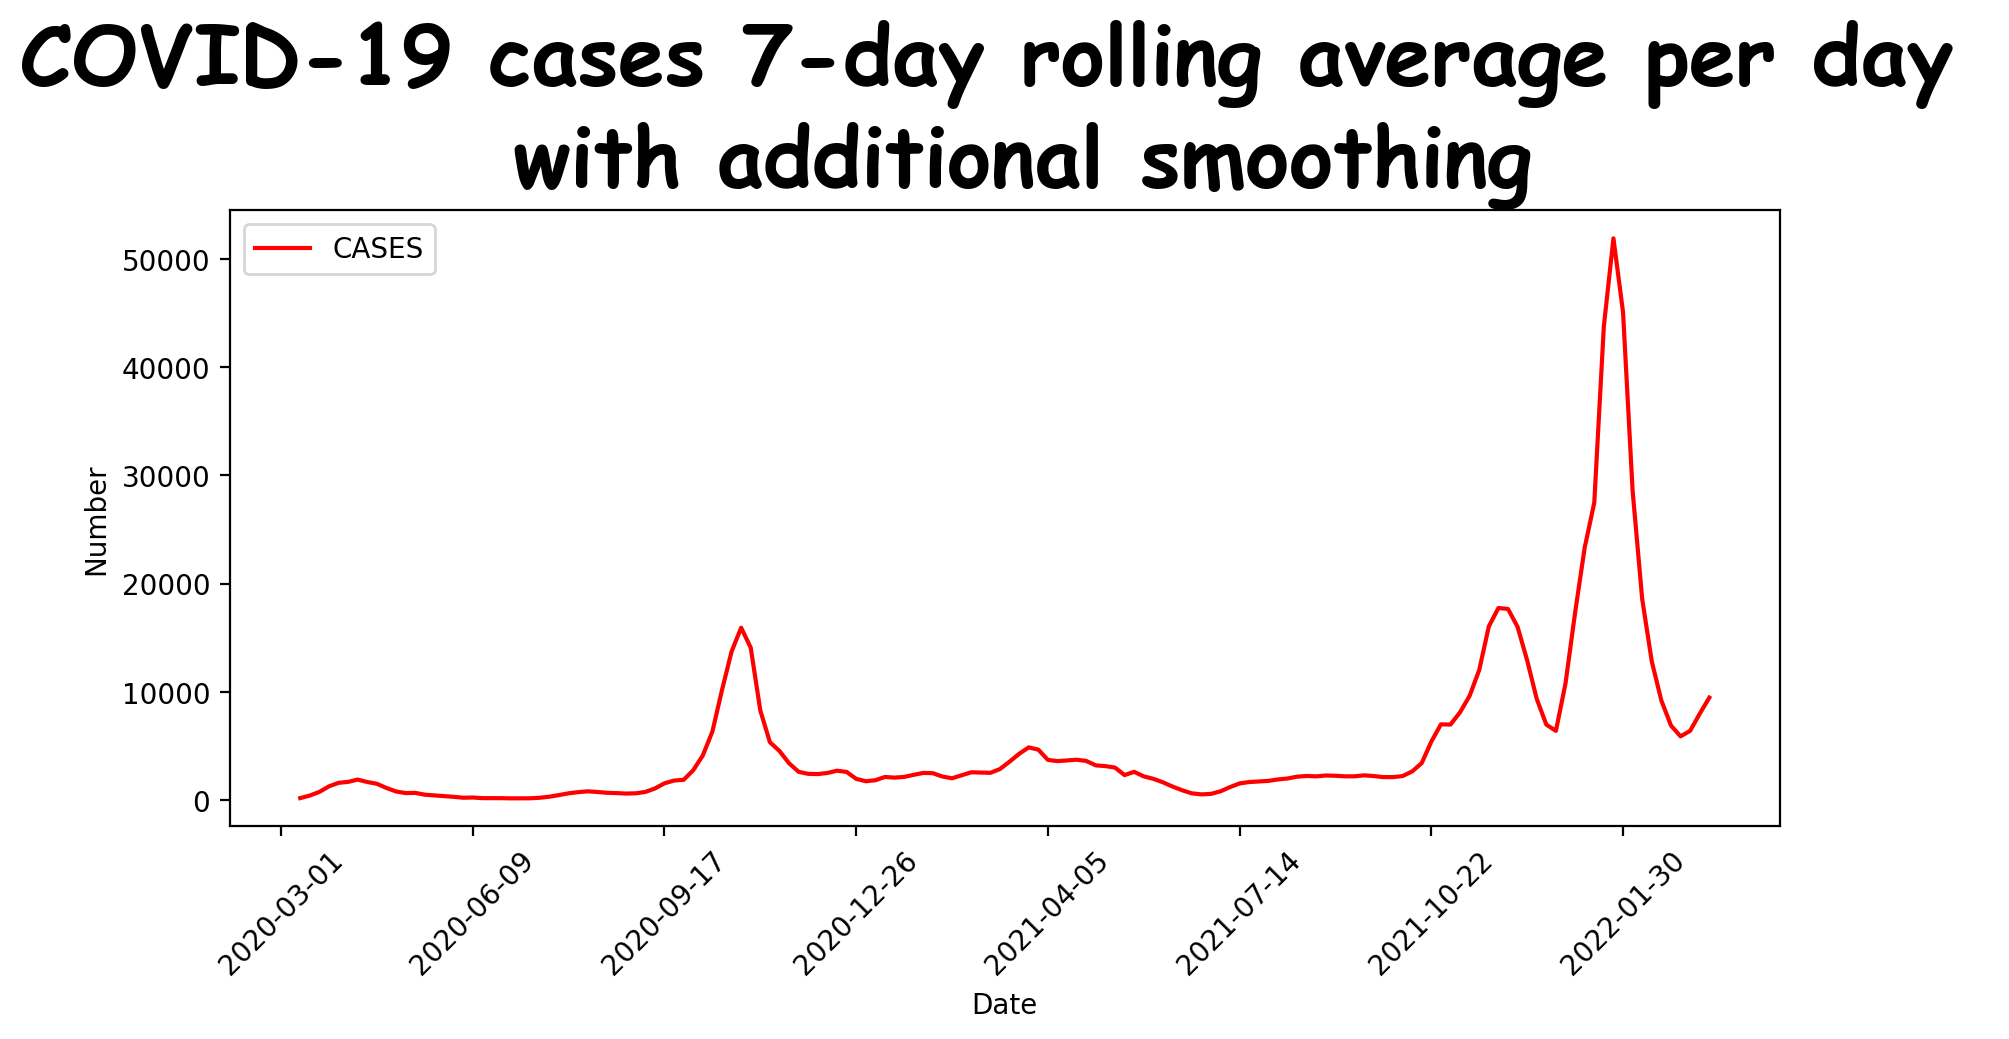

In [78]:
# plt.xkcd();
groupedDate['CASES'].rolling(7).mean()[::5].plot(legend=True, c='red', figsize=(10,4))
# groupedDate['Hospital_admission'].rolling(7).mean()[::5].plot(legend=True, c='blue', figsize=(10,4))
# groupedDate['Total_reported'].rolling(7).mean()[::5].plot(legend=True, c='red', figsize=(10,4))

plt.title('COVID-19 cases 7-day rolling average per day \n with additional smoothing', fontname="Comic Sans MS", fontsize=30, fontweight="bold")
leg = ax.get_legend();
leg.set_bbox_to_anchor((0., 0., 0.2, 0.2))
leg.set_title('Cumulative deaths per million')
plt.ylabel('Number')
plt.xlabel('Date')
plt.xticks(rotation=45);

In [67]:
directory = '/Users/maartenk/Documents/git/CookBooks/Sources/'
dataframe = 'map_df_combined'
file = f'{dataframe}_BE'
fp = directory+file

In [68]:
file

'map_df_combined_BE'

In [69]:
fp

'/Users/maartenk/Documents/git/CookBooks/Sources/map_df_combined_BE'

In [70]:
map_df_combined.to_pickle(fp)

In [71]:
temp = pd.read_pickle(fp)
